<a href="https://colab.research.google.com/github/ochekroun/labs/blob/master/IFAGE_Cours_6_Introduction_%C3%A0_Q_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pr√©paration
---

Pensez √† utiliser un GPU pour ce notebook !

In [ ]:
import sys

if 'google.colab' in sys.modules:
    # Clone le projet GitHub
    !git clone https://github.com/MasterScrat/droneRL-workshop.git --single-branch

    # Installe les packages via pip
    !pip install -r "droneRL-workshop/colab-requirements.txt"

    # Red√©marre le Runtime pour utiliser les packages mis √† jours
    import os
    os.kill(os.getpid(), 9)

    # Le Runtime va red√©marrer apr√®s cette √©tape - c'est normal !

In [ ]:
%cd droneRL-workshop

/content/droneRL-workshop


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

Imports
---

In [ ]:
from env.env import DeliveryDrones
from env.wrappers import CompassQTable, LidarCompassQTable, LidarCompassChargeQTable, WindowedGridView
from agents.random import RandomAgent
from agents.qlearning import QLearningAgent
from agents.dqn import DQNAgent, DenseQNetworkFactory, ConvQNetworkFactory
from helpers.rl_helpers import MultiAgentTrainer, plot_rolling_rewards, test_agents, plot_cumulative_rewards, render_video, set_seed, ColabVideo

Introdution √† Q-Learning (compass Q-table)
---

Observation space: Discrete(8)
Initial state: {0: '‚Üò', 1: '‚Üí', 2: '‚Üê'}


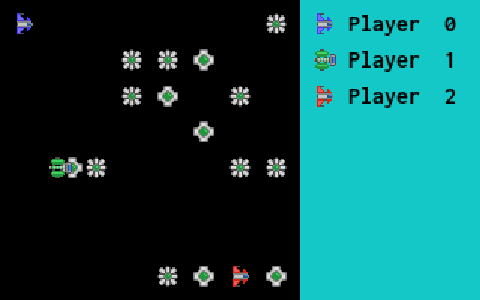

In [ ]:
# On utilise le wrapper simple CompassQTable
env = CompassQTable(DeliveryDrones())

# Environnement sans gratte-ciels, ni d√©charge
env.env_params.update({
    'n_drones': 3,
    'skyscrapers_factor': 0,
    'stations_factor': 0,
    'discharge': 0,
    'rgb_render_rescale': 1.5,
    })

states = env.reset()

print('Observation space:', env.observation_space)
print('Initial state:', {drone_index: env.format_state(state) for drone_index, state in states.items()})
Image.fromarray(env.render(mode='rgb_array'))

In [ ]:
# On cr√©e les agents
agents = {drone.index: RandomAgent(env) for drone in env.drones}
agents[0] = QLearningAgent(
    env,
    gamma=0.95, # Discount factor
    alpha=0.1, # Learning rate
    # Exploration rate
    epsilon_start=1, epsilon_decay=0.99, epsilon_end=0.01
)
agents

{0: <agents.qlearning.QLearningAgent at 0x7ea5a4091930>,
 1: <agents.random.RandomAgent at 0x7ea5a40928c0>,
 2: <agents.random.RandomAgent at 0x7ea5a40922c0>}

In [ ]:
# Entrainement
trainer = MultiAgentTrainer(env, agents, reset_agents=True, seed=0)
trainer.train(5000)

/usr/local/lib/python3.10/dist-packages/gym/core.py:172: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed) instead.
  deprecation(
Training agents: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5000/5000 [00:02<00:00, 1949.06it/s]


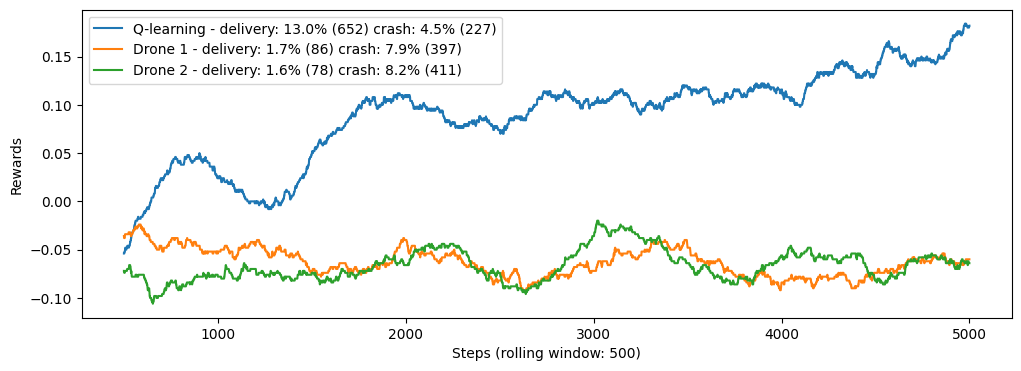

In [ ]:
plot_rolling_rewards(trainer.rewards_log, drones_labels={0: 'Q-learning'})

In [ ]:
agents[0].get_qtable()

‚Üê     ‚Üì     ‚Üí     ‚Üë    X
‚Üí   1.8   1.4   2.6   1.4    2
‚Üô   1.5   2.5   1.2  0.73  1.3
‚Üê   2.9   1.9   1.3   1.3  2.2
‚Üì   1.5   3.2  0.93  0.96  1.8
‚Üñ   1.5  0.92   1.2   2.4  1.4
‚Üë   1.1   1.3   1.3     3  1.9
‚Üó  0.68  0.91   2.1     1  1.2
‚Üò   1.2   1.6   2.6   1.5  1.5

  and should_run_async(code)



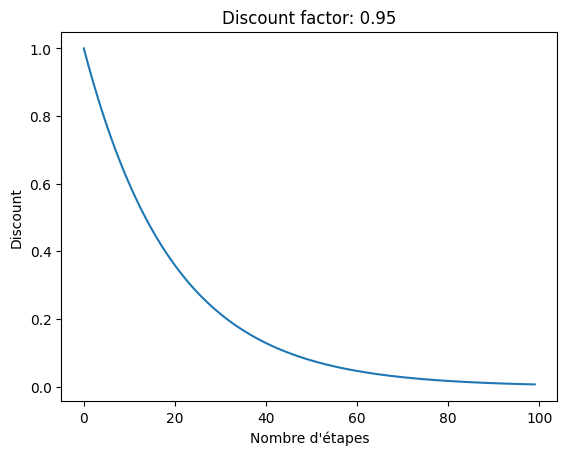

In [ ]:
plt.plot(agents[0].gamma**np.arange(100))
plt.title('Discount factor: {}'.format(agents[0].gamma))
plt.xlabel('Nombre d\'√©tapes')
plt.ylabel('Discount')
plt.show()

/usr/local/lib/python3.10/dist-packages/gym/core.py:172: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed) instead.
  deprecation(
Testing agents: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [00:00<00:00, 1752.20it/s]


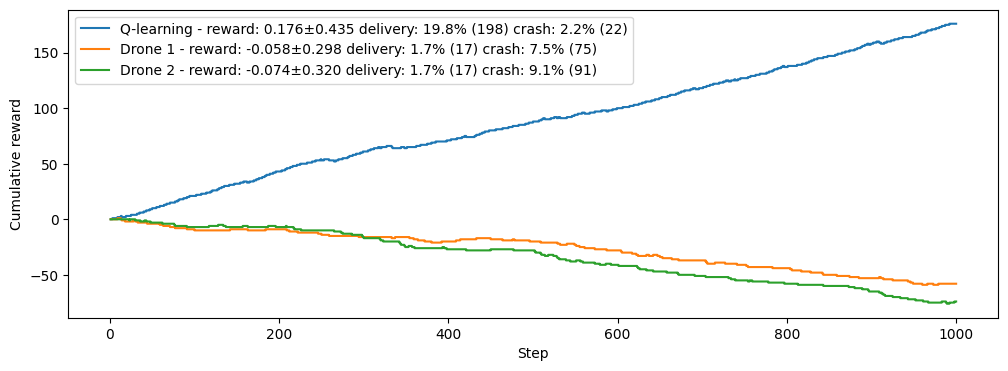

In [ ]:
rewards_log = test_agents(env, agents, n_steps=1000, seed=0)
plot_cumulative_rewards(rewards_log, drones_labels={0: 'Q-learning'})

In [ ]:
path = os.path.join('output', 'videos', 'ql-compass.mp4')
render_video(env, agents, video_path=path, n_steps=120, fps=1, seed=0)
ColabVideo(path)

  from scipy.ndimage.filters import sobel

  deprecation(

t:   0%|                                                | 3/2880 [00:00<01:42, 28.05it/s, now=None]

Moviepy - Building video output/videos/ql-compass.mp4.
Moviepy - Writing video output/videos/ql-compass.mp4



Moviepy - Done !
Moviepy - video ready output/videos/ql-compass.mp4


Allons plus loin : Q-table avec Compass et LIDAR
---

Ajoutons √† pr√©sent des gratte-ciels (skyscrappers), toujours sans d√©charge, mais avec un d√©tecteur de proximit√© (LIDAR).

  and should_run_async(code)



Observation space: Dict(target_dir:Discrete(8), lidar:MultiBinary(8))
Sample state: {0: 'target: ‚Üë, lidar: ‚Üì, ‚Üí', 1: 'target: ‚Üì, lidar: ‚Üë', 2: 'target: ‚Üó, lidar: ‚Üí, ‚Üñ'}


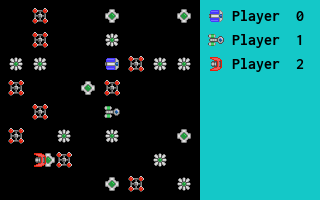

In [ ]:
env = LidarCompassQTable(DeliveryDrones())
env.env_params.update({'n_drones': 3, 'skyscrapers_factor': 3, 'stations_factor': 0, 'discharge': 0})
states = env.reset()

print('Observation space:', env.observation_space)
print('Sample state:', {drone_index: env.format_state(state) for drone_index, state in states.items()})
Image.fromarray(env.render(mode='rgb_array'))

In [ ]:
agents = {drone.index: RandomAgent(env) for drone in env.drones}
agents[0] = QLearningAgent(
    env,
    gamma=0.95, # Discount factor
    alpha=0.1, # Learning rate
    # Exploration rate
    epsilon_start=1, epsilon_decay=0.99, epsilon_end=0.01
)
agents

{0: <agents.qlearning.QLearningAgent at 0x7ea5a91ae6b0>,
 1: <agents.random.RandomAgent at 0x7ea5a91adf60>,
 2: <agents.random.RandomAgent at 0x7ea5a91ae080>}

In [ ]:
trainer = MultiAgentTrainer(env, agents, reset_agents=True, seed=0)
trainer.train(5000)
plot_rolling_rewards(trainer.rewards_log, drones_labels={0: 'Q-learning'})

Training agents: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5000/5000 [00:03<00:00, 1408.52it/s]


Testing agents: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [00:00<00:00, 1409.27it/s]


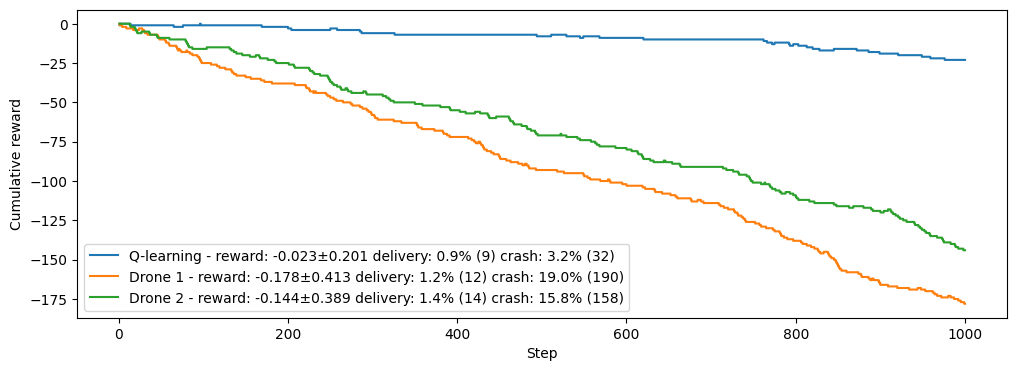

In [ ]:
rewards_log = test_agents(env, agents, n_steps=1000, seed=0)
plot_cumulative_rewards(rewards_log, drones_labels={0: 'Q-learning'})

In [ ]:
path = os.path.join('output', 'videos', 'ql-compass-lidar-1st-try.mp4')
render_video(env, agents, video_path=path, n_steps=120, fps=1, seed=0)
ColabVideo(path)

t:   2%|‚ñâ                                             | 56/2880 [00:00<00:05, 557.25it/s, now=None]

Moviepy - Building video output/videos/ql-compass-lidar-1st-try.mp4.
Moviepy - Writing video output/videos/ql-compass-lidar-1st-try.mp4



Moviepy - Done !
Moviepy - video ready output/videos/ql-compass-lidar-1st-try.mp4


Probl√®mes avec le Q-learning
---

Nous observons deux probl√®mes :

* Les r√©compenses sont rares: moins de 1% de "delivery"
* Pas de g√©n√©ralisation : il faut explorer toutes les solutions possibles !

In [ ]:
q_table = agents[0].get_qtable()
print('Q-table:', q_table.shape)
q_table.sample(10)

Q-table: (484, 5)


‚Üê      ‚Üì     ‚Üí      ‚Üë     X
target: ‚Üë, lidar: ‚Üì, ‚Üò, ‚Üñ            0.64    0.9  0.41   0.63  0.69
target: ‚Üê, lidar: ‚Üó, ‚Üë, ‚Üñ             0.5   0.67  0.23  0.041  0.33
target: ‚Üñ, lidar: ‚Üô, ‚Üì, ‚Üò, ‚Üí, ‚Üë, ‚Üñ   0.79   0.69  0.62  0.073  0.69
target: ‚Üë, lidar: ‚Üê, ‚Üô, ‚Üñ           -0.22   0.68  0.66    1.1  0.69
target: ‚Üí, lidar: ‚Üô, ‚Üò, ‚Üí, ‚Üë         0.88   0.11  0.47  0.049  0.96
target: ‚Üó, lidar: ‚Üô, ‚Üí, ‚Üë            0.72   0.75  0.75  0.076  0.63
target: ‚Üñ, lidar: ‚Üì, ‚Üò, ‚Üí, ‚Üó         0.58  -0.19  0.13   0.69  0.67
target: ‚Üí, lidar: ‚Üô, ‚Üì, ‚Üò, ‚Üó         0.82   0.11  0.11   0.81  0.29
target: ‚Üô, lidar: ‚Üô                  0.33  0.067   0.2   0.71  0.38
target: ‚Üí, lidar: ‚Üò, ‚Üí, ‚Üó            0.81   0.12  0.22   0.36  0.21

Solutions possibles
---

  and should_run_async(code)

  deprecation(

Training agents: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 30000/30000 [00:22<00:00, 1354.85it/s]


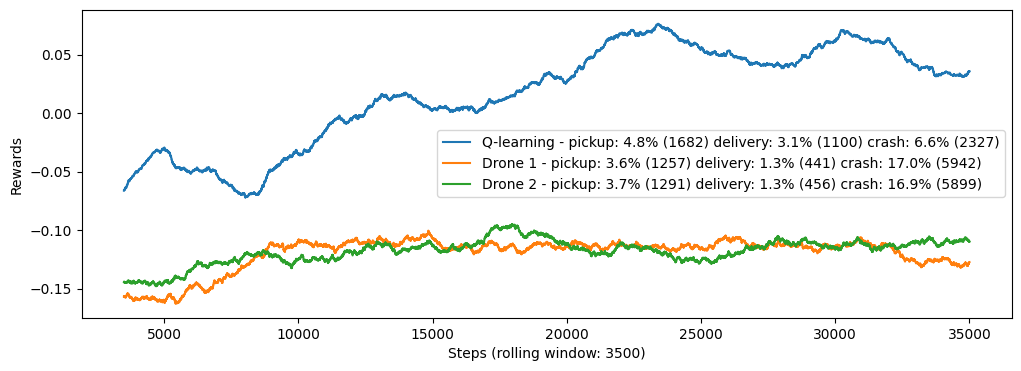

In [ ]:
# (1/2) Cr√©er des r√©compenses interm√©diaires : pickup_reward
env.env_params.update({
    'n_drones': 3, 'pickup_reward': 0.99, 'delivery_reward': 1,
    'skyscrapers_factor': 3, 'stations_factor': 0, 'discharge': 0})
states = env.reset()

# (2/2) Entrainer plus longtemps... ..
agents[0].epsilon = 1
agents[0].epsilon_decay = 0.999

set_seed(env, seed=0)
trainer.train(30000)

plot_rolling_rewards(
    trainer.rewards_log,
    events={'pickup': [0.99], 'delivery': [1], 'crash': [-1]},
    drones_labels={0: 'Q-learning'})

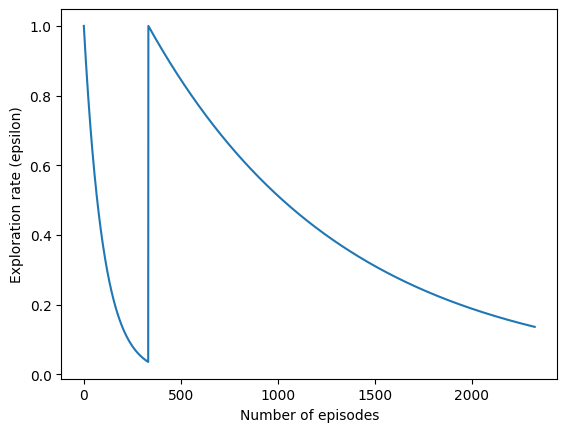

In [ ]:
plt.plot(agents[0].epsilons)
plt.xlabel('Number of episodes')
plt.ylabel('Exploration rate (epsilon)')
plt.show()

In [ ]:
rewards_log = test_agents(env, agents, n_steps=1000, seed=0)
plot_cumulative_rewards(
    rewards_log,
    events={'pickup': [0.99], 'delivery': [1], 'crash': [-1]},
    drones_labels={0: 'Q-learning'}
)

Testing agents: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [00:01<00:00, 971.63it/s]


Risque de sur-entrainement ("overfitting")
---

Pour l'instant, on entraine notre agent que dans un seul environnement. Que ce passe-t-il si on le change ?

In [ ]:
rewards_log = test_agents(env, agents, n_steps=1000, seed=1)
plot_cumulative_rewards(
    rewards_log,
    events={'pickup': [0.99], 'delivery': [1], 'crash': [-1]},
    drones_labels={0: 'Q-learning'}
)

Testing agents: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [00:00<00:00, 1058.14it/s]


In [ ]:
path = os.path.join('output', 'videos', 'ql-compass-lidar-2nd-try.mp4')
render_video(env, agents, video_path=path, n_steps=120, fps=1, seed=1)
ColabVideo(path)

t:   2%|‚ñä                                             | 53/2880 [00:00<00:05, 526.17it/s, now=None]

Moviepy - Building video output/videos/ql-compass-lidar-2nd-try.mp4.
Moviepy - Writing video output/videos/ql-compass-lidar-2nd-try.mp4



Moviepy - Done !
Moviepy - video ready output/videos/ql-compass-lidar-2nd-try.mp4


# Exercice : Entrainez le meilleur agent possible dans cet environnement !

- Validez que votre agent est robuste en l'√©valuant dans plusieurs environnements
- Comparez la performance en l'entrainant plus ou moins
- Modifier les diff√©rents param√®tres : learning rate, discount factor...

Limitation du Q-learning: la taille de la Q-table!
---

Essayons maintenant avec l'environnment complet : avec gratte-ciels et d√©charge

In [ ]:
env = LidarCompassChargeQTable(DeliveryDrones())
env.env_params.update({
    'n_drones': 3, 'pickup_reward': 0.99, 'delivery_reward': 1,
    'discharge': 10, 'charge': 20, 'charge_reward': -0.1  # (default values)
})
states = env.reset()

print('Observation space:', env.observation_space)
print('Sample state:', env.format_state(states[0]))
Image.fromarray(env.render(mode='rgb_array'))

Observation space: Dict(target_dir:Discrete(8), station_dir:Discrete(9), charge_level:Discrete(4), lidar:MultiBinary(8))
Sample state: target: ‚Üó, lidar: ‚Üò, station: ‚Üô, charge: 3


Training agents: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 35000/35000 [00:36<00:00, 955.20it/s]


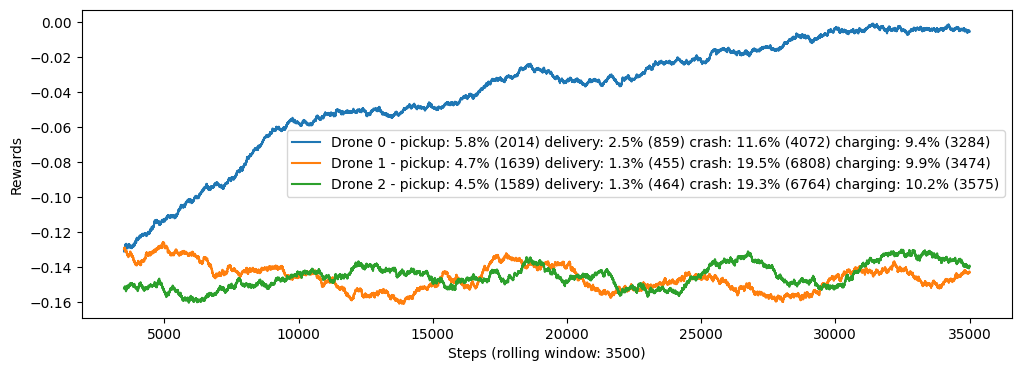

In [ ]:
agents = {drone.index: RandomAgent(env) for drone in env.drones}
agents[0] = QLearningAgent(
    env, gamma=0.95, alpha=0.1,
    epsilon_start=1, epsilon_decay=0.999, epsilon_end=0.01
)

trainer = MultiAgentTrainer(env, agents, reset_agents=True, seed=0)
trainer.train(35000)
plot_rolling_rewards(trainer.rewards_log, events={'pickup': [0.99], 'delivery': [1], 'crash': [-1], 'charging': [-0.1]})

In [ ]:
q_table = agents[0].get_qtable()
print('Q-table:', q_table.shape)
q_table.sample(10)

Q-table: (4751, 5)


‚Üê      ‚Üì      ‚Üí     ‚Üë  \
target: ‚Üñ, lidar: ‚Üê, station: ‚Üó, charge: 1          0.15   0.91   0.28  0.88   
target: ‚Üí, lidar: ‚Üô, ‚Üò, station: ‚Üó, charge: 0       0.46   0.83   0.16  0.61   
target: ‚Üñ, lidar: ‚Üô, ‚Üì, ‚Üò, ‚Üë, ‚Üñ, station: ‚Üë, ch...   0.3   0.73   0.84  0.82   
target: ‚Üì, lidar: ‚Üí, station: ‚Üò, charge: 3          0.63  0.011   0.74  0.32   
target: ‚Üô, lidar: ‚Üò, ‚Üë, station: X, charge: 2       0.91   0.33   0.51  0.47   
target: ‚Üò, lidar: ‚Üì, station: ‚Üó, charge: 1          0.65   0.51  0.098   0.3   
target: ‚Üó, lidar: ‚Üê, ‚Üí, station: X, charge: 3       0.26  0.018   0.92  0.74   
target: ‚Üí, lidar: ‚Üò, station: ‚Üò, charge: 2          0.37   0.21   0.66   0.3   
target: ‚Üí, lidar: ‚Üê, ‚Üô, ‚Üì, ‚Üò, ‚Üó, ‚Üñ, station: ‚Üó,...  0.65  0.042   0.69  0.13   
target: ‚Üó, lidar: ‚Üñ, station: ‚Üò, charge: 0          0.16   0.92   0.83  0.73   

                                                       X  
target: ‚Üñ, lidar: ‚Üê, station: ‚Üó, charge: 1          0.92  
target: ‚Üí, lidar: ‚Üô, ‚Üò, station: ‚Üó, charge: 0       0.45  
target: ‚Üñ, lidar: ‚Üô, ‚Üì, ‚Üò, ‚Üë, ‚Üñ, station: ‚Üë, ch...  0.44  
target: ‚Üì, lidar: ‚Üí, station: ‚Üò, charge: 3          0.55  
target: ‚Üô, lidar: ‚Üò, ‚Üë, station: X, charge: 2       0.37  
target: ‚Üò, lidar: ‚Üì, station: ‚Üó, charge: 1          0.22  
target: ‚Üó, lidar: ‚Üê, ‚Üí, station: X, charge: 3       0.62  
target: ‚Üí, lidar: ‚Üò, station: ‚Üò, charge: 2          0.46  
target: ‚Üí, lidar: ‚Üê, ‚Üô, ‚Üì, ‚Üò, ‚Üó, ‚Üñ, station: ‚Üó,...  0.91  
target: ‚Üó, lidar: ‚Üñ, station: ‚Üò, charge: 0           0.5

  and should_run_async(code)

  deprecation(

Testing agents: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [00:00<00:00, 1100.91it/s]


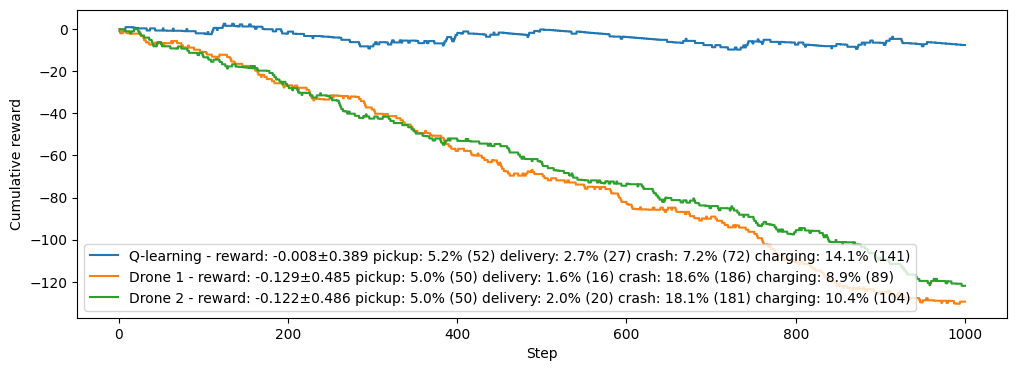

In [ ]:
rewards_log = test_agents(env, agents, n_steps=1000, seed=0)
plot_cumulative_rewards(
    rewards_log,
    events={'pickup': [0.99], 'delivery': [1], 'crash': [-1], 'charging': [-0.1]},
    drones_labels={0: 'Q-learning'}
)

In [ ]:
path = os.path.join('output', 'videos', 'ql-compass-lidar-charge.mp4')
render_video(env, agents, video_path=path, n_steps=120, fps=1, seed=0)
ColabVideo(path)

t:   2%|‚ñâ                                             | 57/2880 [00:00<00:05, 561.97it/s, now=None]

Moviepy - Building video output/videos/ql-compass-lidar-charge.mp4.
Moviepy - Writing video output/videos/ql-compass-lidar-charge.mp4



Moviepy - Done !
Moviepy - video ready output/videos/ql-compass-lidar-charge.mp4


# Pouvez-vous faire mieux ? üí™